# Support Vector Machine Assignment

## Importing Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
df_train = pd.read_csv("SalaryData_Train(1).csv")
df_test = pd.read_csv("SalaryData_Test(1).csv")

## Data Understanding

In [3]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
df_train.shape,df_test.shape

((30161, 14), (15060, 14))

In [6]:
df_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
df_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
df_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [9]:
df_test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

## Data Preprocessing

In [10]:
string_columns = ['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']

In [11]:
string_columns

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native',
 'Salary']

In [12]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [13]:
LabelEncoder = preprocessing.LabelEncoder()

In [14]:
for i in string_columns:
    df_train[i] = LabelEncoder.fit_transform(df_train[i])
    df_test[i] = LabelEncoder.fit_transform(df_test[i])

In [15]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [16]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


In [17]:
df_train.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,30161.000000,30161.00000,30161.00000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,2.19933,10.33361,10.121316,2.580087,5.959849,1.418322,3.678592,0.675707,1092.044064,88.302311,40.931269,35.413481,0.248931
std,13.134830,0.95394,3.81226,2.550037,1.498018,4.029633,1.601361,0.834721,0.468118,7406.466611,404.121321,11.980182,5.956430,0.432401
min,17.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.00000,9.00000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000,0.000000
50%,37.000000,2.00000,11.00000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000,0.000000
75%,47.000000,2.00000,12.00000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000,0.000000
max,90.000000,6.00000,15.00000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000,1.000000


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

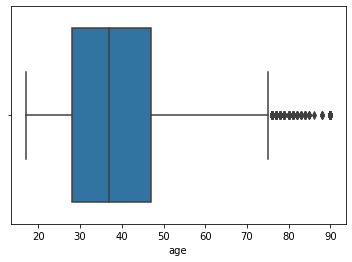

In [32]:
sns.boxplot(df_train['age'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

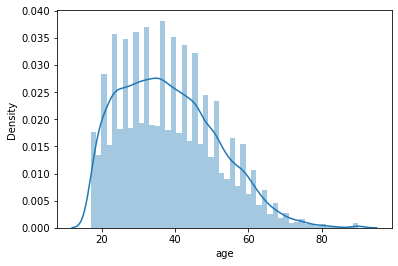

In [43]:
sns.distplot(df_train['age'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='educationno'>

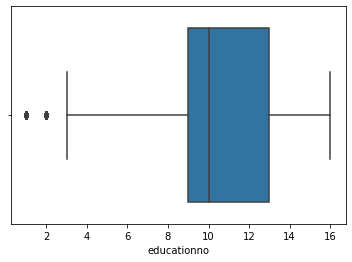

In [44]:
sns.boxplot(df_train['educationno'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='educationno', ylabel='Density'>

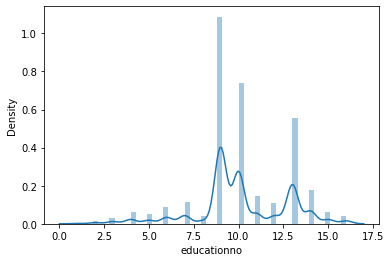

In [45]:
sns.distplot(df_train['educationno'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hoursperweek', ylabel='Density'>

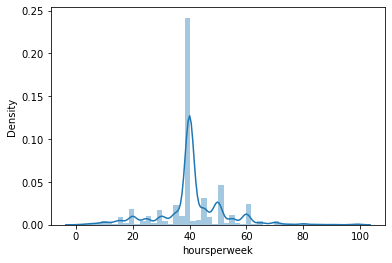

In [46]:
sns.distplot(df_train['hoursperweek'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='maritalstatus'>

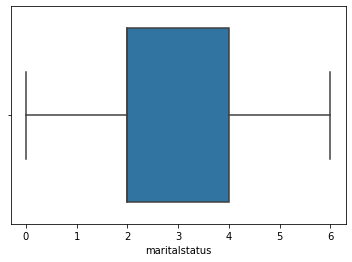

In [31]:
sns.boxplot(df_train['maritalstatus'])

In [38]:
df_test.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,2.214874,10.272377,10.112749,2.595286,5.989044,1.401394,3.683665,0.673772,1120.301594,89.041899,40.951594,35.467596,0.245684
std,13.380676,0.966422,3.826251,2.558727,1.505336,4.020113,1.588954,0.827630,0.468848,7703.181842,406.283245,12.062831,5.880922,0.430506
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000,0.000000
50%,37.000000,2.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000,0.000000
75%,48.000000,2.000000,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000,0.000000
max,90.000000,6.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,3770.000000,99.000000,39.000000,1.000000


In [21]:
df_train.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.080537,-0.001091,0.043525,-0.276363,-0.005682,-0.246452,0.023380,0.081972,0.080152,0.060278,0.101598,-0.001548,0.241991
workclass,0.080537,1.000000,0.017864,0.037833,-0.034235,0.015572,-0.067414,0.044734,0.074966,0.035349,0.007244,0.050723,0.007598,0.018040
education,-0.001091,0.017864,1.000000,0.345420,-0.040704,-0.038213,-0.012732,0.011139,-0.027831,0.030582,0.014822,0.059892,0.079715,0.079013
educationno,0.043525,0.037833,0.345420,1.000000,-0.063419,0.087717,-0.091935,0.032805,0.006155,0.124416,0.079691,0.152522,0.092625,0.335287
maritalstatus,-0.276363,-0.034235,-0.040704,-0.063419,1.000000,0.022655,0.177955,-0.068641,-0.119774,-0.042414,-0.035385,-0.189004,-0.026057,-0.193504
occupation,-0.005682,0.015572,-0.038213,0.087717,0.022655,1.000000,-0.053727,0.000717,0.062316,0.022162,0.014612,0.018365,-0.003298,0.051577
relationship,-0.246452,-0.067414,-0.012732,-0.091935,0.177955,-0.053727,1.000000,-0.117148,-0.584881,-0.058257,-0.063659,-0.257850,-0.010661,-0.250998
race,0.023380,0.044734,0.011139,0.032805,-0.068641,0.000717,-0.117148,1.000000,0.089207,0.014355,0.023461,0.048533,0.126507,0.071666
sex,0.081972,0.074966,-0.027831,0.006155,-0.119774,0.062316,-0.584881,0.089207,1.000000,0.048809,0.047285,0.231272,0.000063,0.216680
capitalgain,0.080152,0.035349,0.030582,0.124416,-0.042414,0.022162,-0.058257,0.014355,0.048809,1.000000,-0.032218,0.080431,0.008513,0.221195


In [22]:
df_test.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.096037,-0.007948,0.026123,-0.262577,-0.002214,-0.249701,0.024485,0.082265,0.078760,0.057745,0.102758,-0.005683,0.227469
workclass,0.096037,1.000000,0.018005,0.046623,-0.031329,0.021271,-0.060235,0.059749,0.059161,0.032980,0.010242,0.052614,-0.003635,0.011008
education,-0.007948,0.018005,1.000000,0.351486,-0.043117,-0.023999,-0.014227,0.012133,-0.026978,0.028626,0.020568,0.062892,0.077065,0.085554
educationno,0.026123,0.046623,0.351486,1.000000,-0.068079,0.093643,-0.081413,0.029355,-0.002052,0.131750,0.085817,0.133691,0.097188,0.327813
maritalstatus,-0.262577,-0.031329,-0.043117,-0.068079,1.000000,0.003854,0.185495,-0.073718,-0.120374,-0.042405,-0.034073,-0.171665,-0.016532,-0.191058
occupation,-0.002214,0.021271,-0.023999,0.093643,0.003854,1.000000,-0.047381,-0.001561,0.045244,0.014165,0.016580,0.011755,-0.001311,0.046218
relationship,-0.249701,-0.060235,-0.014227,-0.081413,0.185495,-0.047381,1.000000,-0.121481,-0.579212,-0.054040,-0.048091,-0.261905,0.000500,-0.258335
race,0.024485,0.059749,0.012133,0.029355,-0.073718,-0.001561,-0.121481,1.000000,0.088450,0.013539,0.015799,0.037125,0.125514,0.069227
sex,0.082265,0.059161,-0.026978,-0.002052,-0.120374,0.045244,-0.579212,0.088450,1.000000,0.044843,0.045360,0.231744,-0.014178,0.213863
capitalgain,0.078760,0.032980,0.028626,0.131750,-0.042405,0.014165,-0.054040,0.013539,0.044843,1.000000,-0.031876,0.090501,0.005923,0.220882


## Heatmap is showing correlation between features and target

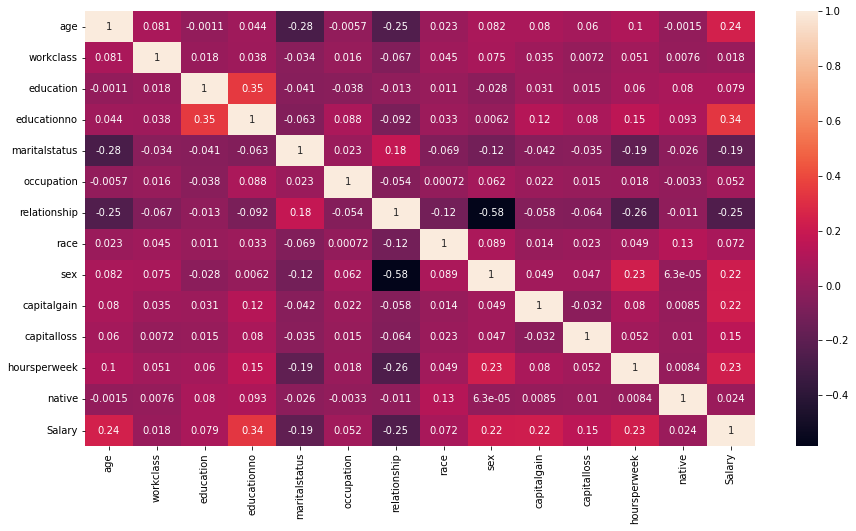

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

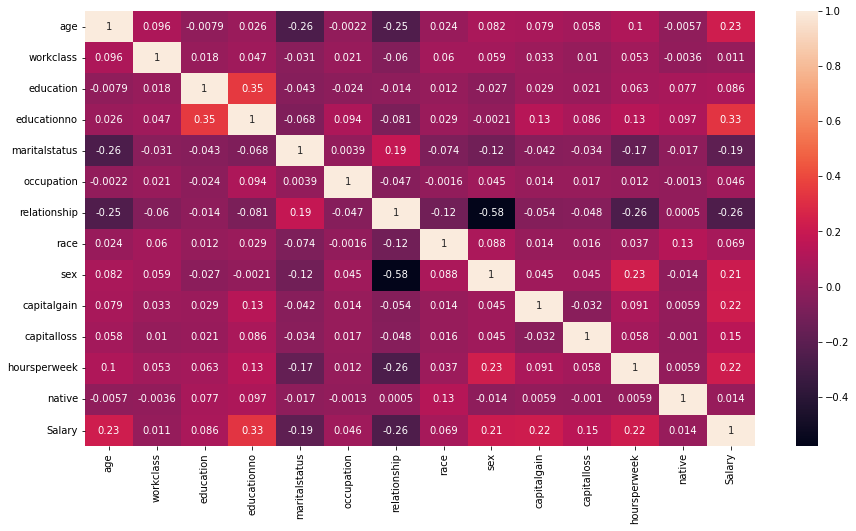

In [26]:
plt.figure(figsize=(15,8))
sns.heatmap(df_test.corr(),annot=True)
plt.show()

In [19]:
df_train.dtypes, df_test.dtypes

(age              int64
 workclass        int32
 education        int32
 educationno      int64
 maritalstatus    int32
 occupation       int32
 relationship     int32
 race             int32
 sex              int32
 capitalgain      int64
 capitalloss      int64
 hoursperweek     int64
 native           int32
 Salary           int32
 dtype: object,
 age              int64
 workclass        int32
 education        int32
 educationno      int64
 maritalstatus    int32
 occupation       int32
 relationship     int32
 race             int32
 sex              int32
 capitalgain      int64
 capitalloss      int64
 hoursperweek     int64
 native           int32
 Salary           int32
 dtype: object)

## Splitting a training a testing data in features and target

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score

In [21]:
X_train = df_train.iloc[:,0:13]
y_train = df_train.iloc[:,13]
X_test = df_test.iloc[:,0:13]
y_test = df_test.iloc[:,13]

In [22]:
X_train.shape, y_train.shape

((30161, 13), (30161,))

In [23]:
X_test.shape, y_test.shape

((15060, 13), (15060,))

## Evaluating a model

In [24]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [25]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[0.5],'C':[1] }] # Gamma is for RBF and C is for polynomial kernal
gsv = GridSearchCV(clf,param_grid,cv=10) # Grid Search CV gives best parameter
gsv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1], 'gamma': [0.5], 'kernel': ['rbf']}])

In [26]:
gsv.best_params_ , gsv.best_score_ 

({'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}, 0.767083340477946)

In [27]:
clf = SVC(C= 0.1, gamma = 60)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 75.4316069057105


array([[11360,     0],
       [ 3700,     0]], dtype=int64)

## Using a rbf kernel with gamma=0.5 and c=1, we get Accuracy=75.43